In [54]:
# How many employees does the company have?
n_employees = 100

# How many days are we calculating the loss?
n_days = 365

# On average how many phishing emails does each employee receive weekly?
n_phishing_emails_per_week = 1

# How many of the phishing emails do employees click?
click_rate = 0.1

# How much money do we expect to lose with each click?
loss_per_click = 1000

In [55]:
# estimated loss due to clicking on phishing emails for a single employee
def employee_click_loss(n_days,
                        n_phishing_emails_per_week,
                        click_rate,
                        loss_per_click,
                        random_seed=None):
    import pandas as pd
    import numpy as np
    import random as rn

    # Set the random seed if provided
    if random_seed is not None:
        np.random.seed(random_seed)

    # Define the parameters for the the exponential distribution
    lambda_ = n_phishing_emails_per_week / 7  # convert rate to days

    # Generate the time intervals between phishing emails
    time_intervals = np.random.exponential(scale=1 / lambda_,
                                           size=int(lambda_ * n_days * 1.1))

    # Calculate the email arrival times as the cumulative sum of time intervals
    event_times = np.cumsum(time_intervals)

    # Select those event times that are within the time horizon
    valid_times = [
        event_time for event_time in event_times if event_time <= n_days
    ]

    # Calculate which days the emails arrived
    event_days = np.round(valid_times).astype(int)

    # Replicate probabilities
    click_rates = np.full(len(event_days), click_rate)

    # Select which emails the employee opened
    emails_opened = [
        event_day for event_day, click_rate in zip(event_days, click_rates)
        if rn.random() < click_rate
    ]

    # Calculate loss
    loss = len(emails_opened) * loss_per_click

    return {
        "time_intervals": time_intervals,
        "event_times": event_times,
        "event_days": event_days,
        "click_rates": click_rates,
        "emails_opened": emails_opened,
        "loss": loss
    }


# simulate total loss due to clicking on phishing emails for the company
def company_click_loss(n_employees,
                       n_days,
                       n_phishing_emails_per_week,
                       click_rate,
                       loss_per_click,
                       n_simulations,
                       random_seed=None):

    import matplotlib.pyplot as plt

    # calculate total loss
    company_loss = []
    for simulation in range(n_simulations):
        total_loss = 0
        for employee in range(n_employees):
            employee_loss = employee_click_loss(
                n_days=n_days,
                n_phishing_emails_per_week=n_phishing_emails_per_week,
                click_rate=click_rate,
                loss_per_click=loss_per_click,
                random_seed=random_seed)
            total_loss += employee_loss['loss']
        company_loss.append(total_loss)

    # plot histogram
    plt.hist(company_loss)
    plt.xlabel('Total loss')
    plt.ylabel('Frequency')
    plt.title('Phishing Risk Simulation')
    plt.show()

    return {"company_loss": company_loss, "plot": plt}

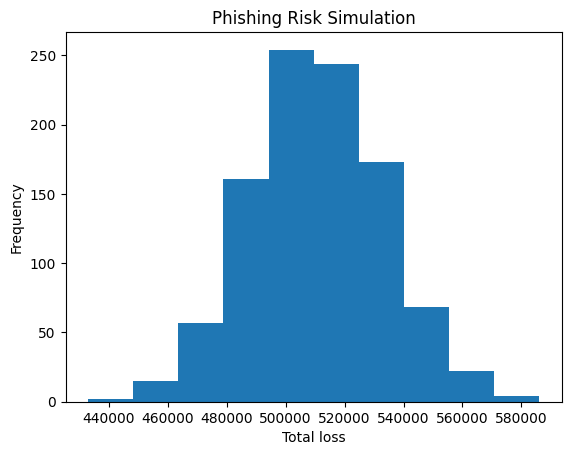

In [56]:
company_loss = company_click_loss(
    n_employees=n_employees,
    n_days=n_days,
    n_phishing_emails_per_week=n_phishing_emails_per_week,
    click_rate=click_rate,
    loss_per_click=loss_per_click,
    n_simulations=1000,
    random_seed=None)